In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import warnings

warnings.filterwarnings('ignore')

In [6]:
def X(t, a, alpha, gamma, flag):
    if flag == 0:
        return (a + alpha) * (1 + (gamma * t) / (2 * np.sqrt(a + alpha)))**2
    if flag == 1:
        return (a + alpha) * (1 - (gamma * t) / (2 * np.sqrt(a + alpha)))**2
    return "No flag"

def P(t, a, alpha, gamma, flag):
    if flag == 0:
        return 1 / (1 + (gamma * t) / (2 * np.sqrt(a + alpha)))
    if flag == 1:
        return 1 / (1 - (gamma * t) / (2 * np.sqrt(a + alpha)))
    return "No flag"

In [30]:
t = np.linspace(0, 12, 5)
tR = np.linspace(0, 12, 10000)
alpha = np.linspace(-4, 10, 8)
alphaR = np.linspace(-11, 11, 100000)

a = 5
gamma = 0.2

X_clctd_alpha = []
P_clctd_alpha = []

for i in t:
    tmp_arr_X = []
    tmp_arr_P = []
    for j in alphaR:
        tmp_arr_X.append(X(i, a, j, gamma, 0))
        tmp_arr_P.append(P(i, a, j, gamma, 0))
    X_clctd_alpha.append(tmp_arr_X)
    P_clctd_alpha.append(tmp_arr_P)

for i in t:
    tmp_arr_X = []
    tmp_arr_P = []
    for j in alphaR:
        tmp_arr_X.append(X(i, a, j, gamma, 1))
        tmp_arr_P.append(P(i, a, j, gamma, 1))
    X_clctd_alpha.append(tmp_arr_X)
    P_clctd_alpha.append(tmp_arr_P)
    
X_clctd_t = []
P_clctd_t = []

for i in alpha:
    tmp_arr_X = []
    tmp_arr_P = []
    for j in tR:
        tmp_arr_X.append(X(j, a, i, gamma, 0))
        tmp_arr_P.append(P(j, a, i, gamma, 0))
    X_clctd_t.append(tmp_arr_X)
    P_clctd_t.append(tmp_arr_P)
    
for i in alpha:
    tmp_arr_X = []
    tmp_arr_P = []
    for j in tR:
        tmp_arr_X.append(X(j, a, i, gamma, 1))
        tmp_arr_P.append(P(j, a, i, gamma, 1))
    X_clctd_t.append(tmp_arr_X)
    P_clctd_t.append(tmp_arr_P)

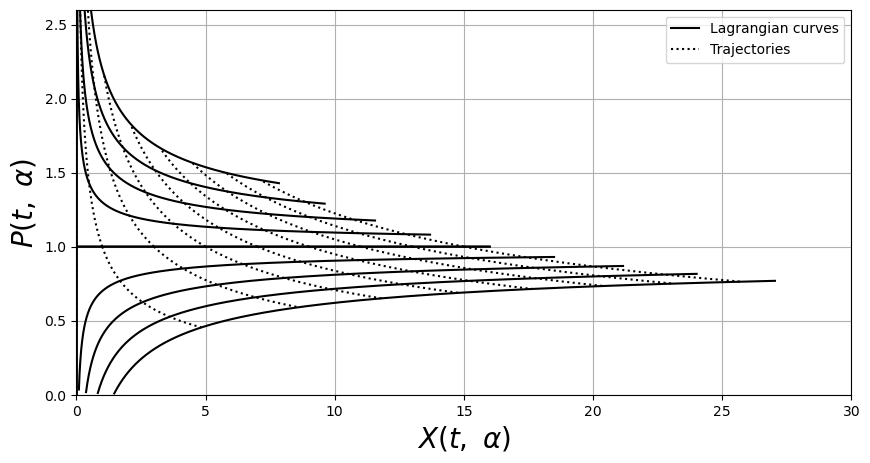

In [31]:
fig = plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(np.array([0 for i in range(1, 51)]), np.linspace(-30, 30), color = "red")

#Для альфа из R и фиксированных значений t
for i in range(len(X_clctd_alpha)):
    if i == 0:
        plt.plot(np.array(X_clctd_alpha[i]), np.array(P_clctd_alpha[i]), color = "black", label="Lagrangian curves")
    else:
        plt.plot(np.array(X_clctd_alpha[i]), np.array(P_clctd_alpha[i]), color = "black")

#Для t из R и фиксированных альфа
for i in range(len(X_clctd_t)):
    if i == 0:
        plt.plot(np.array(X_clctd_t[i]), np.array(P_clctd_t[i]), linestyle="dotted", color = "black", label="Trajectories")
    else:
        plt.plot(np.array(X_clctd_t[i]), np.array(P_clctd_t[i]), linestyle="dotted", color = "black")

plt.xlim([0, 30])
plt.ylim([0, 2.6])

plt.ylabel(r'$P(t,$' + " " + r'$\alpha$' + r'$)$', fontsize = 20)
plt.xlabel(r'$X(t,$' + " " + r'$\alpha$' + r'$)$', fontsize = 20)

plt.legend()
plt.show()